# iris Dataset

In [88]:
#iris
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression
from sklearn import datasets

# import some data to play with
iris = datasets.load_iris() #https://ogrisel.github.io/scikit-learn.org/sklearn-tutorial/modules/generated/sklearn.datasets.load_iris.html
X = iris.data[:, :2]  # we only take the first two features.
Y = iris.target
X.shape

(150, 2)

In [ ]:
Y.shape

(150,)

In [ ]:
logreg = LogisticRegression()#(C=1e5)
# Create an instance of Logistic Regression Classifier and fit the data.
logreg.fit(X, Y)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [ ]:
# Plot the decision boundary. For that, we will assign a color to each
# point in the mesh [x_min, x_max]x[y_min, y_max].
x_min, x_max = X[:, 0].min() - .5, X[:, 0].max() + .5
y_min, y_max = X[:, 1].min() - .5, X[:, 1].max() + .5
print([x_min, x_max, y_min, y_max])
h = .02  # step size in the mesh
xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))#https://numpy.org/doc/stable/reference/generated/numpy.meshgrid.html
print(xx.shape)
print(yy.shape)

[3.8, 8.4, 1.5, 4.9]
(171, 231)
(171, 231)


In [ ]:
newxxyy=np.c_[xx.ravel(), yy.ravel()] #https://numpy.org/devdocs/reference/generated/numpy.c_.html#:~:text=numpy.,because%20of%20its%20common%20occurrence.
newxxyy.shape

(39501, 2)

In [ ]:
Z = logreg.predict(newxxyy)
Z.shape

(39501,)

In [ ]:
from sklearn.metrics import classification_report
y_afterpred=logreg.predict(X)
print(classification_report(Y, y_afterpred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        50
           1       0.73      0.74      0.73        50
           2       0.73      0.72      0.73        50

    accuracy                           0.82       150
   macro avg       0.82      0.82      0.82       150
weighted avg       0.82      0.82      0.82       150



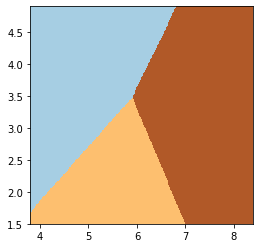

In [ ]:
# Put the result into a color plot
Z = Z.reshape(xx.shape)
plt.figure(1, figsize=(4, 4))
plt.pcolormesh(xx, yy, Z, cmap=plt.cm.Paired)

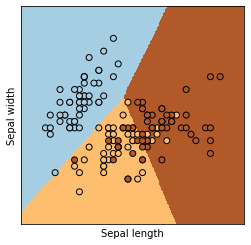

In [ ]:
plt.figure(1, figsize=(4, 4))
plt.pcolormesh(xx, yy, Z, cmap=plt.cm.Paired)

# Plot also the training points
plt.scatter(X[:, 0], X[:, 1], c=Y, edgecolors='k', cmap=plt.cm.Paired)
plt.xlabel('Sepal length')
plt.ylabel('Sepal width')

plt.xlim(xx.min(), xx.max())
plt.ylim(yy.min(), yy.max())
plt.xticks(())
plt.yticks(())

plt.show()

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
knclass = KNeighborsClassifier(3)
# Create an instance of Logistic Regression Classifier and fit the data.
knclass.fit(X, Y)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=3, p=2,
                     weights='uniform')

In [ ]:
Z = knclass.predict(newxxyy)#mesh grid
Z.shape

(39501,)

In [ ]:
from sklearn.metrics import classification_report
y_afterpred=knclass.predict(X)
print(classification_report(Y, y_afterpred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        50
           1       0.82      0.72      0.77        50
           2       0.75      0.84      0.79        50

    accuracy                           0.85       150
   macro avg       0.86      0.85      0.85       150
weighted avg       0.86      0.85      0.85       150



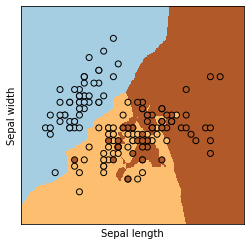

In [ ]:
# Put the result into a color plot
Z = Z.reshape(xx.shape)
plt.figure(1, figsize=(4, 4))
plt.pcolormesh(xx, yy, Z, cmap=plt.cm.Paired)
plt.figure(1, figsize=(4, 3))
plt.pcolormesh(xx, yy, Z, cmap=plt.cm.Paired)

# Plot also the training points
plt.scatter(X[:, 0], X[:, 1], c=Y, edgecolors='k', cmap=plt.cm.Paired)
plt.xlabel('Sepal length')
plt.ylabel('Sepal width')

plt.xlim(xx.min(), xx.max())
plt.ylim(yy.min(), yy.max())
plt.xticks(())
plt.yticks(())

plt.show()

# BigQuery US Census Income Dataset

## Fetch Data from Big Query

In [32]:
from google.colab import auth
auth.authenticate_user()
print('Authenticated')

Authenticated


In [27]:
%load_ext google.colab.data_table

The google.colab.data_table extension is already loaded. To reload it, use:
  %reload_ext google.colab.data_table


In [28]:
project_id = 'cmpe181hw1option1'
!gcloud config list project

[core]
project = ccmpe181hw1option1

Your active configuration is: [default]


In [31]:
!gcloud config set project 'ccmpe181hw1option1'

Updated property [core/project].


In [90]:
from google.cloud import bigquery

# https://cloud.google.com/resource-manager/docs/creating-managing-projects
project_id = 'cmpe181hw1option1'
client = bigquery.Client(project=project_id)

In [34]:
sql = """
SELECT
    *
FROM
    `bigquery-public-data.ml_datasets.census_adult_income`
"""
dfquery = client.query(sql)
df_census=dfquery.to_dataframe()
df_census.head(200)

,age,workclass,functional_weight,education,education_num,marital_status,occupation,relationship,race,sex,capital_gain,capital_loss,hours_per_week,native_country,income_bracket
0,39,Private,297847,9th,5,Married-civ-spouse,Other-service,Wife,Black,Female,3411,0,34,United-States,<=50K
1,72,Private,74141,9th,5,Married-civ-spouse,Exec-managerial,Wife,Asian-Pac-Islander,Female,0,0,48,United-States,>50K
2,45,Private,178215,9th,5,Married-civ-spouse,Machine-op-inspct,Wife,White,Female,0,0,40,United-States,>50K
3,31,Private,86958,9th,5,Married-civ-spouse,Exec-managerial,Wife,White,Female,0,0,40,United-States,<=50K
4,55,Private,176012,9th,5,Married-civ-spouse,Tech-support,Wife,White,Female,0,0,23,United-States,<=50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
195,33,Private,262439,HS-grad,9,Married-civ-spouse,Adm-clerical,Wife,White,Female,0,0,35,United-States,>50K
196,31,Private,196788,HS-grad,9,Married-civ-spouse,Adm-clerical,Wife,White,Female,0,0,40,United-States,<=50K
197,47,Private,151267,HS-grad,9,Married-civ-spouse,Machine-op-inspct,Wife,Black,Female,15024,0,40,United-States,>50K
198,35,Private,148903,HS-grad,9,Married-civ-spouse,Other-service,Wife,White,Female,0,0,16,United-States,>50K


In [35]:
print(len(df_census))

32561


In [37]:
df_census.dtypes

age                   int64
workclass            object
functional_weight     int64
education            object
education_num         int64
marital_status       object
occupation           object
relationship         object
race                 object
sex                  object
capital_gain          int64
capital_loss          int64
hours_per_week        int64
native_country       object
income_bracket       object
dtype: object

## Data Visualization

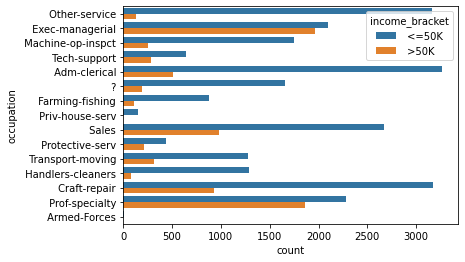

In [38]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
# sns.set_style('dark')
#plt.style.use('dark_background')
#plt.style.use('ggplot')

sns.countplot(y='occupation', hue='income_bracket', data=df_census)

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


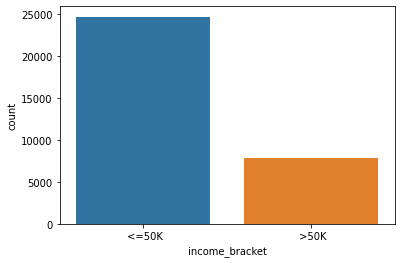

In [39]:
# Count of >50K & <=50K
sns.countplot(df_census['income_bracket'],label="Count")

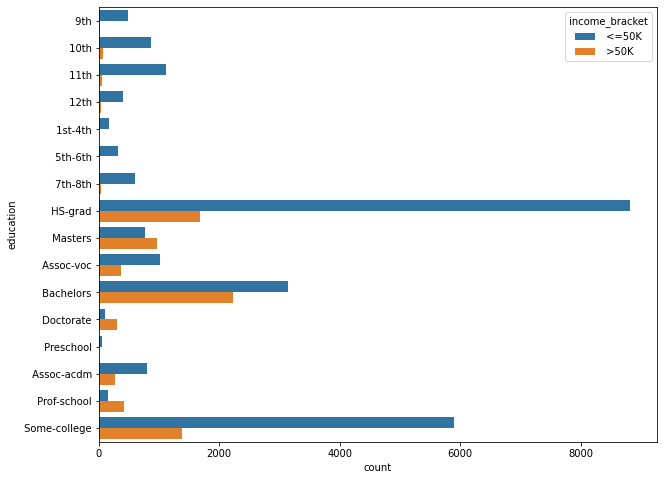

In [40]:
plt.figure(figsize=(10,8))
sns.countplot(y='education', hue='income_bracket', data=df_census)

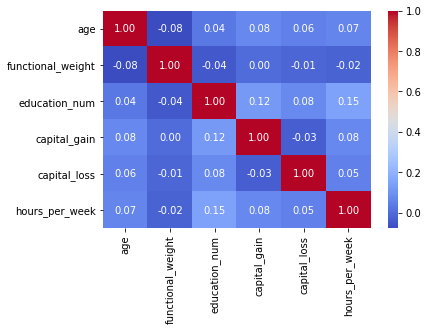

In [41]:
# Identify Numeric features
numeric_columns = df_census.select_dtypes(['int64']).columns
numeric_columns
# Correlation matrix between numerical values
sns.heatmap(df_census[numeric_columns].corr(),annot=True, fmt = ".2f", cmap = "coolwarm")

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


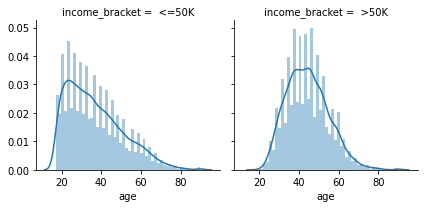

In [42]:
# Explore Age vs Income
g = sns.FacetGrid(df_census, col='income_bracket')
g = g.map(sns.distplot, "age")

## Feature Extraction
the categorical values themselves are not useful for machine learning; we need a single instance table that contains numeric values. In order to extract this from the dataset, we’ll have to use Scikit-Learn transformers to transform our input dataset into something that can be fit to a model. 
*   encode the categorical labels as numeric data
*   impute missing values with data (or remove)

Sckit-Learn does provide a transformer for converting categorical labels into numeric integers: sklearn.preprocessing.LabelEncoder.
The LabelEncoder has fit and transform methods (as well as a special all-in-one, fit_transform method) that can be used for stateful transformation of a dataset.
The fit method discovers all unique elements in the given vector, orders them lexicographically, and assigns them an integer value. These values are actually the indices of the elements inside the LabelEncoder.classes_ attribute, which can also be used to do a reverse lookup of the class name from the integer value.

In [43]:
df_census_sex=df_census['sex']
df_census_sex.head()

0     Female
1     Female
2     Female
3     Female
4     Female
Name: sex, dtype: object

In [44]:
from sklearn.preprocessing import LabelEncoder
gender = LabelEncoder()
gender.fit(df_census_sex)
print(gender.classes_)

[' Female' ' Male']


In [45]:
# transform a simple simulation data
print(gender.transform([
    ' Female', ' Female', ' Male', ' Female', ' Male'
]))

[0 0 1 0 1]


In [46]:
#In order to create a multicolumn LabelEncoder, we’ll have to extend the TransformerMixin in Scikit-Learn to create a transformer class of our own
from sklearn.base import BaseEstimator, TransformerMixin
class EncodeCategorical(BaseEstimator, TransformerMixin):
    """
    Encodes a specified list of columns or all columns if None.
    """
    def __init__(self, columns=None):
        self.columns  = columns
        self.encoders = None
    def fit(self, data, target=None):
        """
        Expects a data frame with named columns to encode.
        """
        # Encode all columns if columns is None
        if self.columns is None:
            self.columns = data.columns
        # Fit a label encoder for each column in the data frame
        self.encoders = {
            column: LabelEncoder().fit(data[column])
            for column in self.columns
        }
        return self
    def transform(self, data):
        """
        Uses the encoders to transform a data frame.
        """
        output = data.copy()
        for column, encoder in self.encoders.items():
            output[column] = encoder.transform(data[column])
        return output

In [47]:
numeric_columns = df_census.select_dtypes(['int64']).columns
numeric_columns

Index(['age', 'functional_weight', 'education_num', 'capital_gain',
       'capital_loss', 'hours_per_week'],
      dtype='object')

In [48]:
# Convert integer valued (numeric) columns to floating point
df_census[numeric_columns] = df_census[numeric_columns].astype('float32') # change to float

In [49]:
df_census.head()

,age,workclass,functional_weight,education,education_num,marital_status,occupation,relationship,race,sex,capital_gain,capital_loss,hours_per_week,native_country,income_bracket
0,39.0,Private,297847.0,9th,5.0,Married-civ-spouse,Other-service,Wife,Black,Female,3411.0,0.0,34.0,United-States,<=50K
1,72.0,Private,74141.0,9th,5.0,Married-civ-spouse,Exec-managerial,Wife,Asian-Pac-Islander,Female,0.0,0.0,48.0,United-States,>50K
2,45.0,Private,178215.0,9th,5.0,Married-civ-spouse,Machine-op-inspct,Wife,White,Female,0.0,0.0,40.0,United-States,>50K
3,31.0,Private,86958.0,9th,5.0,Married-civ-spouse,Exec-managerial,Wife,White,Female,0.0,0.0,40.0,United-States,<=50K
4,55.0,Private,176012.0,9th,5.0,Married-civ-spouse,Tech-support,Wife,White,Female,0.0,0.0,23.0,United-States,<=50K


In [50]:
cat_columns = df_census.select_dtypes(['object']).columns
cat_columns

Index(['workclass', 'education', 'marital_status', 'occupation',
       'relationship', 'race', 'sex', 'native_country', 'income_bracket'],
      dtype='object')

In [51]:
test = LabelEncoder()
test.fit(df_census[cat_columns[0]])
print(test.classes_)

[' ?' ' Federal-gov' ' Local-gov' ' Never-worked' ' Private'
 ' Self-emp-inc' ' Self-emp-not-inc' ' State-gov' ' Without-pay']


In [52]:
test.fit(df_census[cat_columns[1]])
print(test.classes_)

[' 10th' ' 11th' ' 12th' ' 1st-4th' ' 5th-6th' ' 7th-8th' ' 9th'
 ' Assoc-acdm' ' Assoc-voc' ' Bachelors' ' Doctorate' ' HS-grad'
 ' Masters' ' Preschool' ' Prof-school' ' Some-college']


In [53]:
test.fit(df_census[cat_columns[2]])
print(test.classes_)

[' Divorced' ' Married-AF-spouse' ' Married-civ-spouse'
 ' Married-spouse-absent' ' Never-married' ' Separated' ' Widowed']


In [54]:
test.fit(df_census[cat_columns[3]])
print(test.classes_)

[' ?' ' Adm-clerical' ' Armed-Forces' ' Craft-repair' ' Exec-managerial'
 ' Farming-fishing' ' Handlers-cleaners' ' Machine-op-inspct'
 ' Other-service' ' Priv-house-serv' ' Prof-specialty' ' Protective-serv'
 ' Sales' ' Tech-support' ' Transport-moving']


In [55]:
test.fit(df_census[cat_columns[4]])
print(test.classes_)

[' Husband' ' Not-in-family' ' Other-relative' ' Own-child' ' Unmarried'
 ' Wife']


In [56]:
test.fit(df_census[cat_columns[5]])
print(test.classes_)

[' Amer-Indian-Eskimo' ' Asian-Pac-Islander' ' Black' ' Other' ' White']


In [58]:
test.fit(df_census[cat_columns[7]])
print(test.classes_)

[' ?' ' Cambodia' ' Canada' ' China' ' Columbia' ' Cuba'
 ' Dominican-Republic' ' Ecuador' ' El-Salvador' ' England' ' France'
 ' Germany' ' Greece' ' Guatemala' ' Haiti' ' Holand-Netherlands'
 ' Honduras' ' Hong' ' Hungary' ' India' ' Iran' ' Ireland' ' Italy'
 ' Jamaica' ' Japan' ' Laos' ' Mexico' ' Nicaragua'
 ' Outlying-US(Guam-USVI-etc)' ' Peru' ' Philippines' ' Poland'
 ' Portugal' ' Puerto-Rico' ' Scotland' ' South' ' Taiwan' ' Thailand'
 ' Trinadad&Tobago' ' United-States' ' Vietnam' ' Yugoslavia']


In [59]:
encoder = EncodeCategorical(cat_columns)
df_census_encoded = encoder.fit_transform(df_census)
df_census_encoded.head()

,age,workclass,functional_weight,education,education_num,marital_status,occupation,relationship,race,sex,capital_gain,capital_loss,hours_per_week,native_country,income_bracket
0,39.0,4,297847.0,6,5.0,2,8,5,2,0,3411.0,0.0,34.0,39,0
1,72.0,4,74141.0,6,5.0,2,4,5,1,0,0.0,0.0,48.0,39,1
2,45.0,4,178215.0,6,5.0,2,7,5,4,0,0.0,0.0,40.0,39,1
3,31.0,4,86958.0,6,5.0,2,4,5,4,0,0.0,0.0,40.0,39,0
4,55.0,4,176012.0,6,5.0,2,13,5,4,0,0.0,0.0,23.0,39,0


In [60]:
df_census.isnull().sum()

age                  0
workclass            0
functional_weight    0
education            0
education_num        0
marital_status       0
occupation           0
relationship         0
race                 0
sex                  0
capital_gain         0
capital_loss         0
hours_per_week       0
native_country       0
income_bracket       0
dtype: int64

In [61]:
cat_columns[7]

'native_country'

In [62]:
cat_columns[3]

'occupation'

In [63]:
cat_columns[0]

'workclass'

In [64]:
from sklearn.impute import SimpleImputer
#https://scikit-learn.org/stable/modules/generated/sklearn.impute.SimpleImputer.html

class ImputeCategorical(BaseEstimator, TransformerMixin):
    """
    Encodes a specified list of columns or all columns if None.
    """
    def __init__(self, columns=None):
        self.columns = columns
        self.imputer = None
    def fit(self, data, target=None):
        """
        Expects a data frame with named columns to impute.
        """
        # Encode all columns if columns is None
        if self.columns is None:
            self.columns = data.columns
        # Fit an imputer for each column in the data frame
        self.imputer = SimpleImputer(missing_values=0, strategy='most_frequent')
        self.imputer.fit(data[self.columns])
        return self
    def transform(self, data):
        """
        Uses the encoders to transform a data frame.
        """
        output = data.copy()
        output[self.columns] = self.imputer.transform(output[self.columns])
        return output


In [65]:
imputer = ImputeCategorical(['workclass', 'native_country', 'occupation'])
df_census_encoded = imputer.fit_transform(df_census_encoded)

In [66]:
df_census_encoded.head(50)

,age,workclass,functional_weight,education,education_num,marital_status,occupation,relationship,race,sex,capital_gain,capital_loss,hours_per_week,native_country,income_bracket
0,39.0,4,297847.0,6,5.0,2,8,5,2,0,3411.0,0.0,34.0,39,0
1,72.0,4,74141.0,6,5.0,2,4,5,1,0,0.0,0.0,48.0,39,1
2,45.0,4,178215.0,6,5.0,2,7,5,4,0,0.0,0.0,40.0,39,1
3,31.0,4,86958.0,6,5.0,2,4,5,4,0,0.0,0.0,40.0,39,0
4,55.0,4,176012.0,6,5.0,2,13,5,4,0,0.0,0.0,23.0,39,0
5,30.0,4,61272.0,6,5.0,2,7,5,4,0,0.0,0.0,40.0,32,0
6,46.0,5,161386.0,6,5.0,2,1,5,4,0,0.0,0.0,50.0,39,0
7,28.0,4,209801.0,6,5.0,2,7,5,4,0,0.0,0.0,40.0,39,0
8,37.0,4,171090.0,6,5.0,2,7,5,2,0,0.0,0.0,48.0,39,0
9,40.0,2,183096.0,6,5.0,2,8,5,4,0,0.0,0.0,40.0,41,1


In [67]:
target=df_census_encoded['income_bracket']
target.head()

0    0
1    1
2    1
3    0
4    0
Name: income_bracket, dtype: int64

In [68]:
df_census_encoded=df_census_encoded.drop(columns=['income_bracket'])
df_census_encoded.head()

,age,workclass,functional_weight,education,education_num,marital_status,occupation,relationship,race,sex,capital_gain,capital_loss,hours_per_week,native_country
0,39.0,4,297847.0,6,5.0,2,8,5,2,0,3411.0,0.0,34.0,39
1,72.0,4,74141.0,6,5.0,2,4,5,1,0,0.0,0.0,48.0,39
2,45.0,4,178215.0,6,5.0,2,7,5,4,0,0.0,0.0,40.0,39
3,31.0,4,86958.0,6,5.0,2,4,5,4,0,0.0,0.0,40.0,39
4,55.0,4,176012.0,6,5.0,2,13,5,4,0,0.0,0.0,23.0,39


## Peform Classification

Now, let's use the train_test_split method from sklearn to divided the data into training and testing datasets.

In [73]:
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(df_census_encoded, target, train_size = 0.8)
X_train.shape, X_test.shape, Y_train.shape, Y_test.shape

((26048, 14), (6513, 14), (26048,), (6513,))

In [74]:
from sklearn.linear_model import LogisticRegression
lgreg=LogisticRegression(max_iter=200)
lgreg.fit(X_train, Y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=200,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [75]:
y_pred=lgreg.predict(X_test)

In [76]:
from sklearn.metrics import classification_report
print(classification_report(Y_test, y_pred))

              precision    recall  f1-score   support

           0       0.81      0.95      0.88      4949
           1       0.66      0.30      0.42      1564

    accuracy                           0.79      6513
   macro avg       0.74      0.63      0.65      6513
weighted avg       0.77      0.79      0.77      6513



In [77]:
from sklearn.metrics import roc_auc_score
from sklearn.metrics import f1_score
print("roc_auc_score: ", roc_auc_score(Y_test, y_pred))
print("f1 score: ", f1_score(Y_test, y_pred))

roc_auc_score:  0.6266810210954809
f1 score:  0.415061295971979


In [78]:
from sklearn.neighbors import KNeighborsClassifier
knclassifier=KNeighborsClassifier()
knclassifier.fit(X_train, Y_train)
y_pred = knclassifier.predict(X_test)

#print('Logistic Regression accuracy score with all the features: {0:0.4f}'. format(accuracy_score(Y_test, y_pred)))
from sklearn.metrics import classification_report
print(classification_report(Y_test, y_pred))
print("roc_auc_score: ", roc_auc_score(Y_test, y_pred))
print("f1 score: ", f1_score(Y_test, y_pred))

              precision    recall  f1-score   support

           0       0.81      0.92      0.86      4949
           1       0.57      0.33      0.42      1564

    accuracy                           0.78      6513
   macro avg       0.69      0.63      0.64      6513
weighted avg       0.75      0.78      0.76      6513

roc_auc_score:  0.6250379833379757
f1 score:  0.41683528935653574


## Perform StandardScaler

In [95]:
from sklearn.preprocessing import StandardScaler

In [91]:
X_train.columns

Index(['age', 'workclass', 'functional_weight', 'education', 'education_num',
       'marital_status', 'occupation', 'relationship', 'race', 'sex',
       'capital_gain', 'capital_loss', 'hours_per_week', 'native_country'],
      dtype='object')

In [92]:
numeric_columns

Index(['age', 'functional_weight', 'education_num', 'capital_gain',
       'capital_loss', 'hours_per_week'],
      dtype='object')

In [93]:
X_train_c=X_train.copy()

In [96]:
numeric_features = X_train_c[numeric_columns]
scaler = StandardScaler().fit(numeric_features.values)
trans_features = scaler.transform(numeric_features.values)
trans_features

array([[-0.8472548 , -0.24728024, -0.41912824, -0.14597593, -0.21511832,
         1.5867808 ],
       [ 0.9887868 , -0.42132   ,  0.74618727, -0.14597593, -0.21511832,
        -0.03453894],
       [-0.40660486,  0.7477798 , -0.03068974, -0.14597593, -0.21511832,
        -0.03453894],
       ...,
       [ 0.7684618 , -0.8008167 , -0.41912824, -0.14597593, -0.21511832,
         0.77612096],
       [-1.4347881 , -0.50914764, -1.1960052 , -0.14597593, -0.21511832,
        -1.3315948 ],
       [-1.1410215 , -1.3104585 , -0.41912824, -0.14597593, -0.21511832,
        -0.19667092]], dtype=float32)

In [97]:
trans_features.shape

(26048, 6)

In [98]:
X_train_c[numeric_columns] = trans_features
X_train_c

,age,workclass,functional_weight,education,education_num,marital_status,occupation,relationship,race,sex,capital_gain,capital_loss,hours_per_week,native_country
6397,-0.847255,2,-0.247280,11,-0.419128,2,14,0,4,1,-0.145976,-0.215118,1.586781,39
11573,0.988787,4,-0.421320,7,0.746187,2,11,0,4,1,-0.145976,-0.215118,-0.034539,39
13888,-0.406605,4,0.747780,15,-0.030690,2,8,0,4,1,-0.145976,-0.215118,-0.034539,39
13826,-0.039397,4,-0.028025,15,-0.030690,2,3,0,4,1,-0.145976,-0.215118,0.370791,39
30698,-0.847255,6,-0.718986,15,-0.030690,4,4,1,4,1,-0.145976,-0.215118,1.586781,39
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9307,-0.406605,2,-0.160393,9,1.134626,2,1,0,4,1,-0.145976,4.414163,0.370791,39
24339,2.016970,4,-0.865219,11,-0.419128,6,1,1,4,0,-0.145976,-0.215118,-0.034539,39
24945,0.768462,6,-0.800817,11,-0.419128,0,12,1,4,1,-0.145976,-0.215118,0.776121,39
15295,-1.434788,4,-0.509148,1,-1.196005,4,5,3,4,1,-0.145976,-0.215118,-1.331595,39


In [99]:
X_test.head(20)

,age,workclass,functional_weight,education,education_num,marital_status,occupation,relationship,race,sex,capital_gain,capital_loss,hours_per_week,native_country
1583,61.0,4,83045.0,6,5.0,2,7,0,4,1,0.0,0.0,40.0,39
22724,31.0,4,164569.0,15,10.0,0,8,4,4,0,0.0,0.0,48.0,39
923,42.0,4,156580.0,9,13.0,2,12,5,4,0,0.0,0.0,40.0,33
10195,51.0,2,110327.0,9,13.0,2,4,0,4,1,0.0,0.0,40.0,39
13333,38.0,4,358682.0,15,10.0,2,6,0,4,1,0.0,0.0,40.0,39
13306,32.0,4,188246.0,15,10.0,2,12,0,4,1,0.0,0.0,40.0,39
11719,37.0,6,348960.0,7,12.0,2,14,0,4,1,0.0,0.0,50.0,39
21801,38.0,6,53628.0,8,11.0,0,4,4,4,1,0.0,0.0,35.0,39
30986,40.0,4,144928.0,15,10.0,0,3,1,4,1,0.0,0.0,40.0,39
5272,42.0,4,175935.0,11,9.0,2,7,0,4,1,0.0,0.0,40.0,39


In [100]:
X_test_c=X_test.copy()
numeric_features = X_test_c[numeric_columns]
scaler = StandardScaler().fit(numeric_features.values)
trans_features = scaler.transform(numeric_features.values)
X_test_c[numeric_columns] = trans_features
X_test_c

Output hidden; open in https://colab.research.google.com to view.

In [101]:
from sklearn.metrics import accuracy_score
logreg = LogisticRegression(max_iter=300)
logreg.fit(X_train_c, Y_train)
y_pred = logreg.predict(X_test_c)

print('Logistic Regression accuracy score with all the features: {0:0.4f}'. format(accuracy_score(Y_test, y_pred)))
from sklearn.metrics import classification_report
print(classification_report(Y_test, y_pred))
print("roc_auc_score: ", roc_auc_score(Y_test, y_pred))
print("f1 score: ", f1_score(Y_test, y_pred))

Logistic Regression accuracy score with all the features: 0.8256
              precision    recall  f1-score   support

           0       0.85      0.94      0.89      4949
           1       0.71      0.47      0.56      1564

    accuracy                           0.83      6513
   macro avg       0.78      0.70      0.73      6513
weighted avg       0.81      0.83      0.81      6513

roc_auc_score:  0.7039580576096129
f1 score:  0.5640828856485034


In [102]:
from sklearn.neighbors import KNeighborsClassifier
knclassifier=KNeighborsClassifier()
knclassifier.fit(X_train_c, Y_train)
y_pred = knclassifier.predict(X_test_c)

print('Logistic Regression accuracy score with all the features: {0:0.4f}'. format(accuracy_score(Y_test, y_pred)))
from sklearn.metrics import classification_report
print(classification_report(Y_test, y_pred))
print("roc_auc_score: ", roc_auc_score(Y_test, y_pred))
print("f1 score: ", f1_score(Y_test, y_pred))

Logistic Regression accuracy score with all the features: 0.8240
              precision    recall  f1-score   support

           0       0.87      0.90      0.89      4949
           1       0.65      0.58      0.61      1564

    accuracy                           0.82      6513
   macro avg       0.76      0.74      0.75      6513
weighted avg       0.82      0.82      0.82      6513

roc_auc_score:  0.7420883549287127
f1 score:  0.6146603900470747


In [103]:
#second option
from sklearn.preprocessing import StandardScaler
#https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.StandardScaler.html

scaler = StandardScaler()

#X_train_s = pd.DataFrame(X_train, columns = X_train.columns) #pd.DataFrame(scaler.fit_transform(X_train), columns = X_train.columns)
X_train_s =pd.DataFrame(scaler.fit_transform(X_train), columns = X_train.columns)
#X_test_s = pd.DataFrame(X_test, columns = X_test.columns) #pd.DataFrame(scaler.transform(X_test), columns = X_test.columns)
X_test_s = pd.DataFrame(scaler.transform(X_test), columns = X_test.columns)
X_train_s.head()

,age,workclass,functional_weight,education,education_num,marital_status,occupation,relationship,race,sex,capital_gain,capital_loss,hours_per_week,native_country
0,-0.847255,-1.901738,-0.247280,0.182346,-0.419128,-0.407352,1.726334,-0.900139,0.395312,0.701271,-0.145976,-0.215118,1.586781,0.264867
1,0.988787,-0.089273,-0.421320,-0.852911,0.746187,-0.407352,0.970175,-0.900139,0.395312,0.701271,-0.145976,-0.215118,-0.034539,0.264867
2,-0.406605,-0.089273,0.747780,1.217604,-0.030690,-0.407352,0.214015,-0.900139,0.395312,0.701271,-0.145976,-0.215118,-0.034539,0.264867
3,-0.039397,-0.089273,-0.028025,1.217604,-0.030690,-0.407352,-1.046251,-0.900139,0.395312,0.701271,-0.145976,-0.215118,0.370791,0.264867
4,-0.847255,1.723192,-0.718986,1.217604,-0.030690,0.920813,-0.794198,-0.277249,0.395312,0.701271,-0.145976,-0.215118,1.586781,0.264867


In [104]:
X_test_s.head(20)

,age,workclass,functional_weight,education,education_num,marital_status,occupation,relationship,race,sex,capital_gain,capital_loss,hours_per_week,native_country
0,1.649762,-0.089273,-1.015292,-1.111725,-1.972882,-0.407352,-0.038038,-0.900139,0.395312,0.701271,-0.145976,-0.215118,-0.034539,0.264867
1,-0.553488,-0.089273,-0.240562,1.217604,-0.030690,-1.735517,0.214015,1.591420,0.395312,-1.425981,-0.145976,-0.215118,0.613989,0.264867
2,0.254370,-0.089273,-0.316482,-0.335282,1.134626,-0.407352,1.222228,2.214309,0.395312,-1.425981,-0.145976,-0.215118,-0.034539,-0.712918
3,0.915345,-1.901738,-0.756029,-0.335282,1.134626,-0.407352,-0.794198,-0.900139,0.395312,0.701271,-0.145976,-0.215118,-0.034539,0.264867
4,-0.039397,-0.089273,1.604114,1.217604,-0.030690,-0.407352,-0.290091,-0.900139,0.395312,0.701271,-0.145976,-0.215118,-0.034539,0.264867
5,-0.480047,-0.089273,-0.015557,1.217604,-0.030690,-0.407352,1.222228,-0.900139,0.395312,0.701271,-0.145976,-0.215118,-0.034539,0.264867
6,-0.112838,1.723192,1.511724,-0.852911,0.746187,-0.407352,1.726334,-0.900139,0.395312,0.701271,-0.145976,-0.215118,0.776121,0.264867
7,-0.039397,1.723192,-1.294845,-0.594096,0.357749,-1.735517,-0.794198,1.591420,0.395312,0.701271,-0.145976,-0.215118,-0.439869,0.264867
8,0.107487,-0.089273,-0.427212,1.217604,-0.030690,-1.735517,-1.046251,-0.277249,0.395312,0.701271,-0.145976,-0.215118,-0.034539,0.264867
9,0.254370,-0.089273,-0.132549,0.182346,-0.419128,-0.407352,-0.038038,-0.900139,0.395312,0.701271,-0.145976,-0.215118,-0.034539,0.264867


In [105]:
from sklearn.metrics import accuracy_score
logreg = LogisticRegression()
logreg.fit(X_train_s, Y_train)
y_pred = logreg.predict(X_test_s)

print('Logistic Regression accuracy score with all the features: {0:0.4f}'. format(accuracy_score(Y_test, y_pred)))
from sklearn.metrics import classification_report
print(classification_report(Y_test, y_pred))
print("roc_auc_score: ", roc_auc_score(Y_test, y_pred))
print("f1 score: ", f1_score(Y_test, y_pred))

Logistic Regression accuracy score with all the features: 0.8259
              precision    recall  f1-score   support

           0       0.85      0.94      0.89      4949
           1       0.71      0.47      0.57      1564

    accuracy                           0.83      6513
   macro avg       0.78      0.70      0.73      6513
weighted avg       0.81      0.83      0.81      6513

roc_auc_score:  0.7048161063822861
f1 score:  0.5655172413793104


## Other Classifiers

In [106]:
from sklearn.neighbors import KNeighborsClassifier
knclassifier=KNeighborsClassifier()
knclassifier.fit(X_train_s, Y_train)
y_pred = knclassifier.predict(X_test_s)

print('Logistic Regression accuracy score with all the features: {0:0.4f}'. format(accuracy_score(Y_test, y_pred)))
from sklearn.metrics import classification_report
print(classification_report(Y_test, y_pred))
print("roc_auc_score: ", roc_auc_score(Y_test, y_pred))
print("f1 score: ", f1_score(Y_test, y_pred))

Logistic Regression accuracy score with all the features: 0.8282
              precision    recall  f1-score   support

           0       0.88      0.90      0.89      4949
           1       0.66      0.60      0.63      1564

    accuracy                           0.83      6513
   macro avg       0.77      0.75      0.76      6513
weighted avg       0.82      0.83      0.83      6513

roc_auc_score:  0.7496267555666261
f1 score:  0.625877632898696


In [108]:
from sklearn.svm import SVC
svcclassifier=SVC(kernel="linear", C=0.025)
svcclassifier.fit(X_train_c, Y_train)
y_pred = svcclassifier.predict(X_test_c)

print('Logistic Regression accuracy score with all the features: {0:0.4f}'. format(accuracy_score(Y_test, y_pred)))
from sklearn.metrics import classification_report
print(classification_report(Y_test, y_pred))
print("roc_auc_score: ", roc_auc_score(Y_test, y_pred))
print("f1 score: ", f1_score(Y_test, y_pred))

Logistic Regression accuracy score with all the features: 0.8150
              precision    recall  f1-score   support

           0       0.82      0.97      0.89      4949
           1       0.79      0.32      0.45      1564

    accuracy                           0.81      6513
   macro avg       0.80      0.64      0.67      6513
weighted avg       0.81      0.81      0.78      6513

roc_auc_score:  0.6442892697328608
f1 score:  0.4505243958048335


In [109]:
from sklearn.tree import DecisionTreeClassifier
decclassifier=DecisionTreeClassifier(max_depth=5)
decclassifier.fit(X_train_s, Y_train)
y_pred = decclassifier.predict(X_test_s)

print('Logistic Regression accuracy score with all the features: {0:0.4f}'. format(accuracy_score(Y_test, y_pred)))
from sklearn.metrics import classification_report
print(classification_report(Y_test, y_pred))
print("roc_auc_score: ", roc_auc_score(Y_test, y_pred))
print("f1 score: ", f1_score(Y_test, y_pred))

Logistic Regression accuracy score with all the features: 0.8551
              precision    recall  f1-score   support

           0       0.87      0.95      0.91      4949
           1       0.79      0.54      0.64      1564

    accuracy                           0.86      6513
   macro avg       0.83      0.75      0.78      6513
weighted avg       0.85      0.86      0.85      6513

roc_auc_score:  0.7478461251052293
f1 score:  0.6421531463229719


In [111]:
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier
randomclassifier=RandomForestClassifier(max_depth=5, n_estimators=10, max_features=1)
randomclassifier.fit(X_train_s, Y_train)
y_pred = randomclassifier.predict(X_test_s)

print('Logistic Regression accuracy score with all the features: {0:0.4f}'. format(accuracy_score(Y_test, y_pred)))
from sklearn.metrics import classification_report
print(classification_report(Y_test, y_pred))
print("roc_auc_score: ", roc_auc_score(Y_test, y_pred))
print("f1 score: ", f1_score(Y_test, y_pred))

Logistic Regression accuracy score with all the features: 0.8045
              precision    recall  f1-score   support

           0       0.80      1.00      0.89      4949
           1       0.98      0.19      0.32      1564

    accuracy                           0.80      6513
   macro avg       0.89      0.59      0.60      6513
weighted avg       0.84      0.80      0.75      6513

roc_auc_score:  0.5941240034541583
f1 score:  0.31742627345844504


In [112]:
adaclassifier=AdaBoostClassifier()
adaclassifier.fit(X_train_s, Y_train)
y_pred = adaclassifier.predict(X_test_s)

print('Logistic Regression accuracy score with all the features: {0:0.4f}'. format(accuracy_score(Y_test, y_pred)))
from sklearn.metrics import classification_report
print(classification_report(Y_test, y_pred))
print("roc_auc_score: ", roc_auc_score(Y_test, y_pred))
print("f1 score: ", f1_score(Y_test, y_pred))

Logistic Regression accuracy score with all the features: 0.8551
              precision    recall  f1-score   support

           0       0.88      0.94      0.91      4949
           1       0.75      0.60      0.66      1564

    accuracy                           0.86      6513
   macro avg       0.81      0.77      0.79      6513
weighted avg       0.85      0.86      0.85      6513

roc_auc_score:  0.7673070950291437
f1 score:  0.6647727272727273


In [113]:
from sklearn.naive_bayes import GaussianNB
gaussianclassifier=GaussianNB()
gaussianclassifier.fit(X_train_s, Y_train)
y_pred = gaussianclassifier.predict(X_test_s)

print('Logistic Regression accuracy score with all the features: {0:0.4f}'. format(accuracy_score(Y_test, y_pred)))
from sklearn.metrics import classification_report
print(classification_report(Y_test, y_pred))
print("roc_auc_score: ", roc_auc_score(Y_test, y_pred))
print("f1 score: ", f1_score(Y_test, y_pred))

Logistic Regression accuracy score with all the features: 0.8085
              precision    recall  f1-score   support

           0       0.82      0.95      0.88      4949
           1       0.69      0.36      0.48      1564

    accuracy                           0.81      6513
   macro avg       0.76      0.66      0.68      6513
weighted avg       0.79      0.81      0.79      6513

roc_auc_score:  0.6560083568511347
f1 score:  0.47627047459050825


In [114]:
from sklearn.neural_network import MLPClassifier
mlpclassifier=MLPClassifier(max_iter=300)#(alpha=1, max_iter=1000)
mlpclassifier.fit(X_train_s, Y_train)
y_pred = mlpclassifier.predict(X_test_s)

print('Logistic Regression accuracy score with all the features: {0:0.4f}'. format(accuracy_score(Y_test, y_pred)))
from sklearn.metrics import classification_report
print(classification_report(Y_test, y_pred))
print("roc_auc_score: ", roc_auc_score(Y_test, y_pred))
print("f1 score: ", f1_score(Y_test, y_pred))

Logistic Regression accuracy score with all the features: 0.8548
              precision    recall  f1-score   support

           0       0.89      0.93      0.91      4949
           1       0.73      0.63      0.67      1564

    accuracy                           0.85      6513
   macro avg       0.81      0.78      0.79      6513
weighted avg       0.85      0.85      0.85      6513

roc_auc_score:  0.77650752509355
f1 score:  0.6742424242424242


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (300) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


In [115]:
from sklearn.neural_network import MLPClassifier #https://scikit-learn.org/stable/modules/generated/sklearn.neural_network.MLPClassifier.html
mlpclassifier=MLPClassifier(hidden_layer_sizes=50, activation='relu', solver='adam', alpha=0.0001, batch_size='auto', learning_rate='adaptive', max_iter=1000)#(alpha=1, max_iter=1000)
mlpclassifier.fit(X_train_s, Y_train)
y_pred = mlpclassifier.predict(X_test_s)

print('Logistic Regression accuracy score with all the features: {0:0.4f}'. format(accuracy_score(Y_test, y_pred)))
from sklearn.metrics import classification_report
print(classification_report(Y_test, y_pred))
print("roc_auc_score: ", roc_auc_score(Y_test, y_pred))
print("f1 score: ", f1_score(Y_test, y_pred))

Logistic Regression accuracy score with all the features: 0.8534
              precision    recall  f1-score   support

           0       0.89      0.92      0.91      4949
           1       0.72      0.64      0.68      1564

    accuracy                           0.85      6513
   macro avg       0.80      0.78      0.79      6513
weighted avg       0.85      0.85      0.85      6513

roc_auc_score:  0.7801901647443308
f1 score:  0.676818950930626


In [116]:
from sklearn.neural_network import MLPClassifier #https://scikit-learn.org/stable/modules/generated/sklearn.neural_network.MLPClassifier.html
mlpclassifier=MLPClassifier(hidden_layer_sizes=200, activation='relu', solver='adam', alpha=0.0001, batch_size='auto', learning_rate='adaptive', max_iter=1000)#(alpha=1, max_iter=1000)
mlpclassifier.fit(X_train_s, Y_train)
y_pred = mlpclassifier.predict(X_test_s)

print('Logistic Regression accuracy score with all the features: {0:0.4f}'. format(accuracy_score(Y_test, y_pred)))
from sklearn.metrics import classification_report
print(classification_report(Y_test, y_pred))
print("roc_auc_score: ", roc_auc_score(Y_test, y_pred))
print("f1 score: ", f1_score(Y_test, y_pred))

Logistic Regression accuracy score with all the features: 0.8392
              precision    recall  f1-score   support

           0       0.89      0.90      0.89      4949
           1       0.67      0.66      0.66      1564

    accuracy                           0.84      6513
   macro avg       0.78      0.78      0.78      6513
weighted avg       0.84      0.84      0.84      6513

roc_auc_score:  0.7778925603818797
f1 score:  0.6634522661523626


# Others

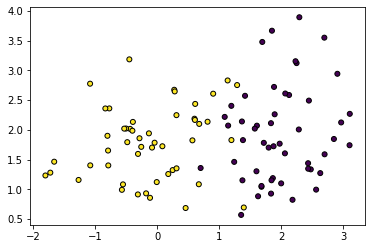

In [117]:
#https://scikit-learn.org/stable/auto_examples/classification/plot_classifier_comparison.html#sphx-glr-auto-examples-classification-plot-classifier-comparison-py
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.datasets import make_moons, make_circles, make_classification
from sklearn.neural_network import MLPClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.gaussian_process import GaussianProcessClassifier
from sklearn.gaussian_process.kernels import RBF
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis

h = .02  # step size in the mesh

names = ["Nearest Neighbors", "Linear SVM", "RBF SVM", "Gaussian Process",
         "Decision Tree", "Random Forest", "Neural Net", "AdaBoost",
         "Naive Bayes", "QDA"]

classifiers = [
    KNeighborsClassifier(3),
    SVC(kernel="linear", C=0.025),
    SVC(gamma=2, C=1),
    GaussianProcessClassifier(1.0 * RBF(1.0)),
    DecisionTreeClassifier(max_depth=5),
    RandomForestClassifier(max_depth=5, n_estimators=10, max_features=1),
    MLPClassifier(alpha=1, max_iter=1000),
    AdaBoostClassifier(),
    GaussianNB(),
    QuadraticDiscriminantAnalysis()]

X, y = make_classification(n_features=2, n_redundant=0, n_informative=2,
                           random_state=1, n_clusters_per_class=1)
rng = np.random.RandomState(2)
X += 2 * rng.uniform(size=X.shape)
linearly_separable = (X, y)

plt.scatter(X[:, 0], X[:, 1], marker='o', c=y,
            s=25, edgecolor='k')

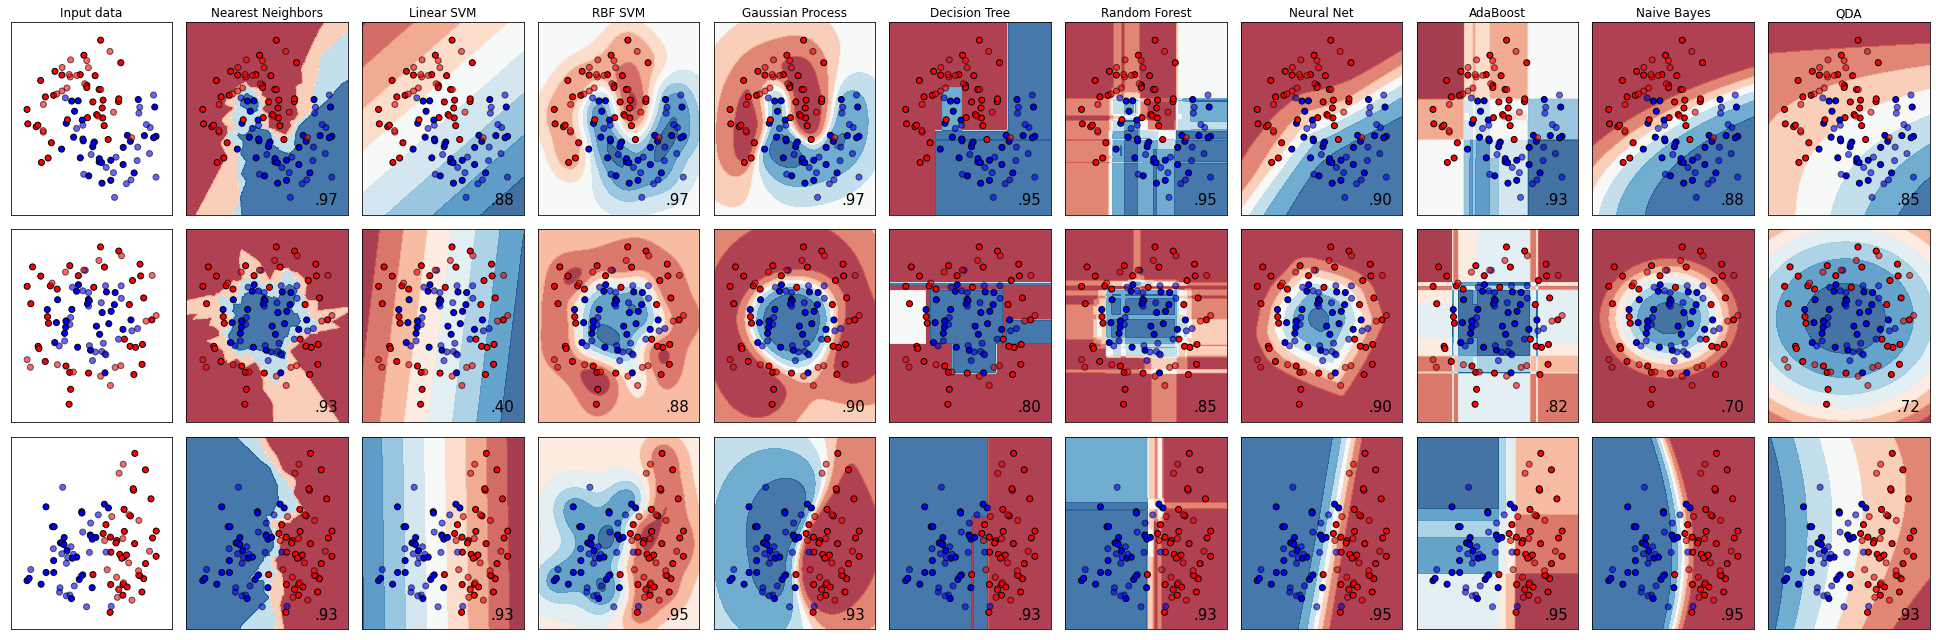

In [118]:


datasets = [make_moons(noise=0.3, random_state=0), #https://scikit-learn.org/stable/modules/generated/sklearn.datasets.make_moons.html
            make_circles(noise=0.2, factor=0.5, random_state=1),
            linearly_separable
            ]

figure = plt.figure(figsize=(27, 9))
i = 1
# iterate over datasets
for ds_cnt, ds in enumerate(datasets):
    # preprocess dataset, split into training and test part
    X, y = ds
    X = StandardScaler().fit_transform(X)
    X_train, X_test, y_train, y_test = \
        train_test_split(X, y, test_size=.4, random_state=42)

    x_min, x_max = X[:, 0].min() - .5, X[:, 0].max() + .5
    y_min, y_max = X[:, 1].min() - .5, X[:, 1].max() + .5
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                         np.arange(y_min, y_max, h))

    # just plot the dataset first
    cm = plt.cm.RdBu
    cm_bright = ListedColormap(['#FF0000', '#0000FF'])
    ax = plt.subplot(len(datasets), len(classifiers) + 1, i)
    if ds_cnt == 0:
        ax.set_title("Input data")
    # Plot the training points
    ax.scatter(X_train[:, 0], X_train[:, 1], c=y_train, cmap=cm_bright,
               edgecolors='k')
    # Plot the testing points
    ax.scatter(X_test[:, 0], X_test[:, 1], c=y_test, cmap=cm_bright, alpha=0.6,
               edgecolors='k')
    ax.set_xlim(xx.min(), xx.max())
    ax.set_ylim(yy.min(), yy.max())
    ax.set_xticks(())
    ax.set_yticks(())
    i += 1

    # iterate over classifiers
    for name, clf in zip(names, classifiers):
        ax = plt.subplot(len(datasets), len(classifiers) + 1, i)
        clf.fit(X_train, y_train)
        score = clf.score(X_test, y_test)

        # Plot the decision boundary. For that, we will assign a color to each
        # point in the mesh [x_min, x_max]x[y_min, y_max].
        if hasattr(clf, "decision_function"):
            Z = clf.decision_function(np.c_[xx.ravel(), yy.ravel()])
        else:
            Z = clf.predict_proba(np.c_[xx.ravel(), yy.ravel()])[:, 1]

        # Put the result into a color plot
        Z = Z.reshape(xx.shape)
        ax.contourf(xx, yy, Z, cmap=cm, alpha=.8)

        # Plot the training points
        ax.scatter(X_train[:, 0], X_train[:, 1], c=y_train, cmap=cm_bright,
                   edgecolors='k')
        # Plot the testing points
        ax.scatter(X_test[:, 0], X_test[:, 1], c=y_test, cmap=cm_bright,
                   edgecolors='k', alpha=0.6)

        ax.set_xlim(xx.min(), xx.max())
        ax.set_ylim(yy.min(), yy.max())
        ax.set_xticks(())
        ax.set_yticks(())
        if ds_cnt == 0:
            ax.set_title(name)
        ax.text(xx.max() - .3, yy.min() + .3, ('%.2f' % score).lstrip('0'),
                size=15, horizontalalignment='right')
        i += 1

plt.tight_layout()
plt.show()

/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_split.py:296: FutureWarning: Setting a random_state has no effect since shuffle is False. This will raise an error in 0.24. You should leave random_state to its default (None), or set shuffle=True.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the n

LR: 0.946124 (0.052577)
LDA: 0.952935 (0.039648)
KNN: 0.934441 (0.048981)
CART: 0.908583 (0.051596)
NB: 0.941141 (0.054175)
SVM: 0.906146 (0.044695)


/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_split.py:296: FutureWarning: Setting a random_state has no effect since shuffle is False. This will raise an error in 0.24. You should leave random_state to its default (None), or set shuffle=True.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_split.py:296: FutureWarning: Setting a random_state has no effect since shuffle is False. This will raise an error in 0.24. You should leave random_state to its default (None), or set shuffle=True.
  FutureWarning


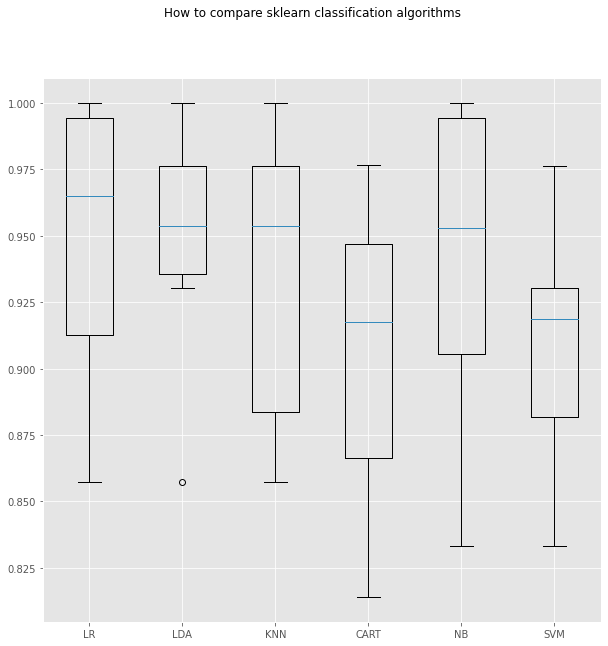

In [120]:
# load libraries
import matplotlib.pyplot as plt
from sklearn import model_selection
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split
from sklearn import datasets
import matplotlib.pyplot as plt
plt.style.use('ggplot')

def compareclassifier():
    # load datasets
    seed = 42
    dataset = datasets.load_breast_cancer()
    X = dataset.data; y = dataset.target
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25)
    kfold = model_selection.KFold(n_splits=10, random_state=seed)

    # prepare models
    models = []
    models.append(('LR', LogisticRegression()))
    models.append(('LDA', LinearDiscriminantAnalysis()))
    models.append(('KNN', KNeighborsClassifier()))
    models.append(('CART', DecisionTreeClassifier()))
    models.append(('NB', GaussianNB()))
    models.append(('SVM', SVC()))
    
    # evaluate each model
    results = []
    names = []
    scoring = 'accuracy'
    for name, model in models:
	     kfold = model_selection.KFold(n_splits=10, random_state=seed)
	     cv_results = model_selection.cross_val_score(model, X_train, y_train, cv=kfold, scoring=scoring)
	     results.append(cv_results)
	     names.append(name)
	     msg = "%s: %f (%f)" % (name, cv_results.mean(), cv_results.std())
	     print(msg)
    # boxplot algorithm comparison
    fig = plt.figure(figsize=(10,10))
    fig.suptitle('How to compare sklearn classification algorithms')
    ax = fig.add_subplot(111)
    plt.boxplot(results)
    ax.set_xticklabels(names)
    plt.show()
compareclassifier()